In [422]:
#Null (or Missing) Values Estimation [Please fill the values without highlight in the blanks in the excel file]
#Data Balance [Only for “classification problem”, and please state the original and final amount of each class of each dataset]
#Feature Selection [Please state the original and final amount of features of each dataset]
#After finishing 1) 2) 3), please save your file to .xlsx for this assignment, and save to .csv for the next one. 

In [423]:
#conda update scikit-learn

In [424]:
#pip install -U imbalanced-learn

In [425]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

In [426]:
#load the data
data=pd.read_csv("bankruptcy.csv")

In [427]:
#realize the shape
data.shape

(6819, 97)

In [428]:
#glace data values
#總共有97個col，前兩個分別為編號和是否破產，剩下95個為feature數量
data.head()

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,NaN,0.564050,1.0,0.016469
1,1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,...,NaN,0.003878,NaN,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490


In [429]:
#checking null data
print(data.isnull().sum())

Unnamed: 0                                                    0
Bankrupt?                                                     0
 ROA(C) before interest and depreciation before interest     98
 ROA(A) before interest and % after tax                     100
 ROA(B) before interest and depreciation after tax           98
                                                           ... 
 Liability to Equity                                        100
 Degree of Financial Leverage (DFL)                          99
 Interest Coverage Ratio (Interest expense to EBIT)          99
 Net Income Flag                                            100
 Equity to Liability                                        100
Length: 97, dtype: int64


In [430]:
#using 最後觀察值推估法(Last Observation Carried Forward(LOCF)) ffill& 下個觀察值推估法(Next Observation Carried Backward(NOCB)) bfill 
#同時使用兩個方法，以防遺漏
#將處理完的data改名為data_fill
data_fill=data.fillna(method='ffill')
data_fill=data_fill.fillna(method='bfill')
data_fill

,Unnamed: 0,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.264577,0.564050,1.0,0.016469
1,1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1.0,0.020794
2,2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1.0,0.016474
3,3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1.0,0.023982
4,4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,...,0.739555,0.003878,0.622929,0.598782,0.839973,0.278514,0.024752,0.575617,1.0,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1.0,0.029890
6815,6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1.0,0.038284
6816,6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1.0,0.097649
6817,6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1.0,0.044009


In [431]:
#check null data
#not null data
print(data_fill.isnull().sum())

Unnamed: 0                                                  0
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 97, dtype: int64


In [432]:
data_fill.columns

Index(['Unnamed: 0', 'Bankrupt?',
       ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
    

In [433]:
#區分出預測值和feature
y=data_fill["Bankrupt?"]
x=data_fill.drop(["Unnamed: 0","Bankrupt?"],axis=1)

In [434]:
y.value_counts()
#0 6599
#1 220

0    6599
1     220
Name: Bankrupt?, dtype: int64

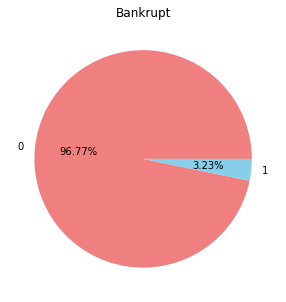

In [435]:
#觀察資料佔比差異，建議使用過採樣處理
plt.figure( figsize=(10,5) )
y.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Bankrupt' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [436]:
#將資料區分為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

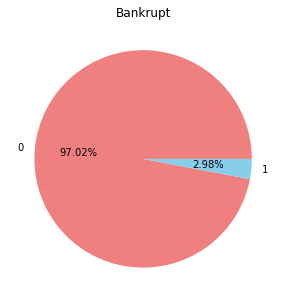

In [437]:
#確定取樣後的訓練集為均勻的
plt.figure( figsize=(10,5) )
y_train.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Bankrupt' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [438]:
y_train.shape

(4773,)

In [439]:
x_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5632,0.500951,0.584169,0.553777,0.600614,0.600549,0.999025,0.797528,0.809438,0.303650,0.781627,...,0.820175,0.002280,0.625785,0.600611,0.841847,0.278811,0.026855,0.565445,1.0,0.033673
903,0.479647,0.588748,0.530007,0.609666,0.609666,0.998971,0.797330,0.809240,0.303417,0.781504,...,0.789320,0.001707,0.623430,0.609661,0.839409,0.281799,0.025910,0.539820,1.0,0.023831
2666,0.516502,0.580953,0.568714,0.610682,0.610682,0.999128,0.797571,0.809469,0.303510,0.781720,...,0.826516,0.000909,0.624479,0.610681,0.841642,0.275619,0.026792,0.565164,1.0,0.113503
109,0.446302,0.531509,0.499545,0.595771,0.595771,0.998895,0.797324,0.809286,0.303565,0.781420,...,0.794111,0.015785,0.623716,0.595770,0.839915,0.277858,0.026101,0.555682,1.0,0.040701
5316,0.575245,0.560565,0.547781,0.600001,0.600001,0.999034,0.797440,0.809349,0.303477,0.781613,...,0.811586,0.002546,0.624576,0.600001,0.841244,0.279156,0.026794,0.565173,1.0,0.031863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.542729,0.601123,0.583597,0.598236,0.598229,0.999014,0.797499,0.809394,0.303621,0.781659,...,0.836504,0.016145,0.624788,0.598231,0.842331,0.276206,0.026800,0.565198,1.0,0.073707
5191,0.550870,0.620148,0.610793,0.610422,0.610228,0.999101,0.797553,0.809468,0.303533,0.781738,...,0.843680,0.001074,0.624009,0.610419,0.843046,0.277142,0.026820,0.565293,1.0,0.049579
5226,0.507288,0.562200,0.556989,0.605529,0.605371,0.999033,0.797433,0.809354,0.303466,0.781615,...,0.813096,0.001194,0.623880,0.605529,0.841088,0.279716,0.026945,0.565898,1.0,0.029459
5390,0.581339,0.644407,0.633706,0.617247,0.617247,0.999129,0.797665,0.809550,0.303672,0.781826,...,0.855711,0.000806,0.623856,0.617243,0.843619,0.276696,0.026800,0.565200,1.0,0.058283


In [440]:
y_train


5632    0
903     0
2666    0
109     0
5316    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Bankrupt?, Length: 4773, dtype: int64

In [441]:
#進行過採樣處理
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [442]:
y_train.shape

(9262,)

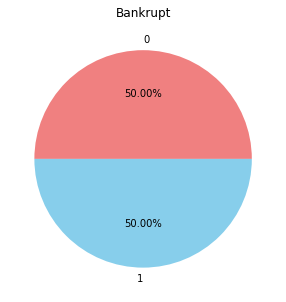

In [443]:
#觀察新的資料佔比差異
plt.figure( figsize=(10,5) )
y_train.value_counts().plot( kind='pie', colors=['lightcoral','skyblue'], autopct='%1.2f%%' )
plt.title( 'Bankrupt' )  # 圖標題
plt.ylabel( '' )
plt.show()

In [444]:
#合成新的資料
data_balance=pd.concat([x_train,y_train],axis=1)
data_balance

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.500951,0.584169,0.553777,0.600614,0.600549,0.999025,0.797528,0.809438,0.303650,0.781627,...,0.002280,0.625785,0.600611,0.841847,0.278811,0.026855,0.565445,1.0,0.033673,0
1,0.479647,0.588748,0.530007,0.609666,0.609666,0.998971,0.797330,0.809240,0.303417,0.781504,...,0.001707,0.623430,0.609661,0.839409,0.281799,0.025910,0.539820,1.0,0.023831,0
2,0.516502,0.580953,0.568714,0.610682,0.610682,0.999128,0.797571,0.809469,0.303510,0.781720,...,0.000909,0.624479,0.610681,0.841642,0.275619,0.026792,0.565164,1.0,0.113503,0
3,0.446302,0.531509,0.499545,0.595771,0.595771,0.998895,0.797324,0.809286,0.303565,0.781420,...,0.015785,0.623716,0.595770,0.839915,0.277858,0.026101,0.555682,1.0,0.040701,0
4,0.575245,0.560565,0.547781,0.600001,0.600001,0.999034,0.797440,0.809349,0.303477,0.781613,...,0.002546,0.624576,0.600001,0.841244,0.279156,0.026794,0.565173,1.0,0.031863,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,0.421816,0.483317,0.480024,0.616467,0.616467,0.998914,0.796710,0.808766,0.302454,0.780978,...,0.000908,0.623562,0.616462,0.837015,0.283417,0.026618,0.563946,1.0,0.021343,1
9258,0.450240,0.491587,0.501564,0.599672,0.599665,0.998971,0.797509,0.809122,0.303159,0.781366,...,0.001632,0.625679,0.599667,0.838306,0.298165,0.026531,0.563495,1.0,0.014864,1
9259,0.383031,0.432944,0.415446,0.598375,0.598375,0.998931,0.797237,0.809164,0.302988,0.781386,...,0.006919,0.622615,0.598375,0.874517,0.274240,0.023641,0.570457,1.0,0.012982,1
9260,0.466592,0.528827,0.513270,0.604149,0.604149,0.999004,0.797137,0.809075,0.303010,0.781313,...,0.008832,0.621534,0.604150,0.838394,0.288202,0.026197,0.618434,1.0,0.017540,1


In [445]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
clf = AdaBoostClassifier(n_estimators=120, random_state=0)


# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)
model = clf
#先觀察都沒做feature selection前的mode準確度
#由於是分類問題，適用LogisticRegression
# model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)



AdaBoostClassifier(n_estimators=120, random_state=0)

In [446]:
#觀察迴歸模型的準確度
# score = model.score(x_test, y_test)
# print('Score: ', score)
# print('Accuracy: ' + str(score*100) + '%')
print(classification_report(y_train, model.predict(x_train)))
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4631
           1       0.98      0.99      0.98      4631

    accuracy                           0.98      9262
   macro avg       0.98      0.98      0.98      9262
weighted avg       0.98      0.98      0.98      9262

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1968
           1       0.35      0.53      0.42        78

    accuracy                           0.94      2046
   macro avg       0.66      0.74      0.69      2046
weighted avg       0.96      0.94      0.95      2046



In [447]:
#feature selection
#使用filter法中的皮爾森相關係數方法作為篩選
#設在相關係數前n大的數字
def feature_selection_n(n):
    featuresCorr = data_balance.corr()
    targetCorr=abs(featuresCorr["Bankrupt?"])
    targetCorr = targetCorr.drop("Bankrupt?")
    result =pd.Series.argsort(-targetCorr)
    targetCorr=targetCorr[result]
    selectedFeatures=targetCorr[0:n]
    #print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")
    return selectedFeatures


In [448]:
selectedFeatures=feature_selection_n(20)
selectedFeatures

 Net worth/Assets                                           0.596772
 Debt ratio %                                               0.592908
 ROA(C) before interest and depreciation before interest    0.572544
 Per Share Net profit before tax (Yuan ¥)                   0.572371
 ROA(B) before interest and depreciation after tax          0.567666
 Persistent EPS in the Last Four Seasons                    0.559234
 Net profit before tax/Paid-in capital                      0.556630
 ROA(A) before interest and % after tax                     0.555546
 Net Income to Total Assets                                 0.547733
 Current Liability to Assets                                0.515936
Name: Bankrupt?, dtype: float64

In [449]:
x_train=data_balance[selectedFeatures.index]
# y_train = 
# data_new=pd.concat([y_train,x_train],axis=1)
# data_new
x_train


,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥),ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(A) before interest and % after tax,Net Income to Total Assets,Current Liability to Assets
0,0.888200,0.111800,0.500951,0.184454,0.553777,0.221329,0.182211,0.584169,0.820175,0.100975
1,0.847689,0.152311,0.479647,0.166755,0.530007,0.209795,0.165832,0.588748,0.789320,0.070766
2,0.966895,0.033105,0.516502,0.181969,0.568714,0.226624,0.180997,0.580953,0.826516,0.034212
3,0.906310,0.093690,0.446302,0.167960,0.499545,0.208093,0.166948,0.531509,0.794111,0.040727
4,0.882396,0.117604,0.575245,0.179935,0.547781,0.224449,0.178999,0.560565,0.811586,0.124032
...,...,...,...,...,...,...,...,...,...,...
9257,0.832479,0.167521,0.421816,0.157228,0.480024,0.200961,0.156222,0.483317,0.767208,0.105351
9258,0.770613,0.229387,0.450240,0.142149,0.501564,0.200636,0.157938,0.491587,0.767265,0.164179
9259,0.745781,0.254219,0.383031,0.145874,0.415446,0.179245,0.146459,0.432944,0.733438,0.212974
9260,0.802202,0.197798,0.466592,0.170939,0.513270,0.201907,0.159491,0.528827,0.784535,0.180458


In [450]:
data_new.to_csv('bankruptcy_HW1_train.csv')

In [451]:
#觀察select後的準確度

In [452]:
x=data_new.drop(["Bankrupt?"],axis=1)
y=data_new["Bankrupt?"]

In [453]:
clf = AdaBoostClassifier(n_estimators=120, random_state=0)


# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X, Y)
model = clf
#先觀察都沒做feature selection前的mode準確度
#由於是分類問題，適用LogisticRegression
# model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=120, random_state=0)

In [454]:

x_test_selection=x_test[selectedFeatures.index]
# data_test=pd.concat([y_test,x_test],axis=1)
# data_test
x_test_selection

,Net worth/Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Per Share Net profit before tax (Yuan ¥),ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(A) before interest and % after tax,Net Income to Total Assets,Current Liability to Assets
239,0.956193,0.043807,0.434456,0.156963,0.498742,0.202515,0.155991,0.481247,0.780293,0.023262
2850,0.870000,0.130000,0.542534,0.188522,0.590663,0.232107,0.187588,0.571413,0.817797,0.106642
2687,0.921365,0.078635,0.584897,0.202305,0.617057,0.244020,0.201365,0.631433,0.847518,0.072207
6500,0.772682,0.227318,0.436942,0.151842,0.482413,0.189279,0.139401,0.490951,0.767650,0.230077
2684,0.817305,0.182695,0.506898,0.182345,0.561754,0.227853,0.181389,0.565526,0.810394,0.083288
...,...,...,...,...,...,...,...,...,...,...
4315,0.904979,0.095021,0.487739,0.176546,0.547727,0.224638,0.175605,0.561164,0.815063,0.095560
2228,0.873265,0.126735,0.517720,0.188747,0.563092,0.228515,0.185016,0.570268,0.817142,0.093595
1083,0.905463,0.094537,0.524204,0.184982,0.565716,0.228798,0.184036,0.569341,0.816698,0.068382
3355,0.902984,0.097016,0.576074,0.201928,0.645859,0.257067,0.198341,0.640536,0.850828,0.084732


In [455]:
#觀察迴歸模型的準確度
score = model.score(x_test_selection, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')
#確實有提升準確度

Score:  0.8621700879765396
Accuracy: 86.21700879765396%


In [456]:
data_new.to_csv('bankruptcy_HW1_test.csv')

In [457]:
print(classification_report(y_test, model.predict(x_test_selection)))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1968
           1       0.19      0.81      0.31        78

    accuracy                           0.86      2046
   macro avg       0.59      0.84      0.62      2046
weighted avg       0.96      0.86      0.90      2046

